In [1]:
import numpy as np
import xarray as xr
from math import *
from matplotlib import cm
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import pyplot as plt

import stagem1.temporal_integration as sti
import stagem1.int_temp_integration as iti
import xsimlab as xs
from scipy.stats import norm
import seaborn as sns

In [2]:
def norm_acc(la,T, **args):
    x=iti.SetUp(k=2*np.pi/la, w=2*np.pi/T,**args)
    ac=x.analytical_acc()
    dac=(x['acc']-ac)**2
    return np.sqrt(dac.where(dac.where(dac.otime<6*24*3600).otime>4*24*3600).mean('otime').mean('a'))

In [64]:
x=iti.SetUp()

In [21]:
h2s=iti.h2s
km=iti.km

T_liste=np.arange(6*h2s,48*h2s, 1*h2s)
LA_liste=np.arange(5*km,100*km, 5*km)
l=len(T_liste)
g=len(LA_liste)

A=np.zeros((l,g))    
for i in range(l):
    print(i)
    for j in range(g):
        A[i][j]=norm_acc(LA_liste[j],T_liste[i])
        
da = xr.DataArray(data=A,
                  dims=["t", "x"],
                  coords=dict(L=(["x"], LA_liste),L_km=(["x"], [i/km for i in LA_liste]),T=(["t"], T_liste),T_h=(["t"], [i/3600 for i in T_liste])),
                  attrs=dict(description="Norme accélération",units=r"$m.s^{-2}$",longname=r"$||\epsilon_a||$"),
                 )
da.L_km.attrs={"units":"km", "long_name":"Longueur d'onde"}
da.T_h.attrs={"units":"h", "long_name":"Période"}
da.L.attrs={"units":"m", "long_name":"Longueur d'onde"}
da.T.attrs={"units":"s", "long_name":"Période"}
da        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


<xarray.DataArray (t: 42, x: 19)>
array([[7.36298037e-06, 4.92803704e-06, 4.25561683e-06, 4.00866325e-06,
        3.88784278e-06, 3.81497431e-06, 3.77482244e-06, 3.75353958e-06,
        3.73391070e-06, 3.72213898e-06, 3.70413642e-06, 3.70664917e-06,
        3.69646453e-06, 3.69472258e-06, 3.68051401e-06, 3.68460320e-06,
        3.68728429e-06, 3.68098258e-06, 3.67589128e-06],
       [5.73944885e-06, 3.52065952e-06, 2.95407485e-06, 2.70440974e-06,
        2.57997648e-06, 2.51081009e-06, 2.46721060e-06, 2.43804633e-06,
        2.41664796e-06, 2.40443713e-06, 2.39340145e-06, 2.37911618e-06,
        2.37776264e-06, 2.37443180e-06, 2.36897208e-06, 2.36608858e-06,
        2.35646647e-06, 2.35464119e-06, 2.35741266e-06],
       [4.76847761e-06, 2.74684082e-06, 2.15464943e-06, 1.92262727e-06,
        1.80844245e-06, 1.73817647e-06, 1.69889028e-06, 1.67762648e-06,
        1.65856470e-06, 1.64554593e-06, 1.63116265e-06, 1.62751958e-06,
        1.62152715e-06, 1.61130173e-06, 1.60747811e-06, 1.60914207e-06,
        1.60587077e-06, 1.60131502e-06, 1.60197572e-06],
       [4.16898116e-06, 2.20071329e-06, 1.67946112e-06, 1.45745554e-06,
        1.34569228e-06, 1.27969600e-06, 1.23938436e-06, 1.21485483e-06,
        1.19593539e-06, 1.18230121e-06, 1.17083764e-06, 1.16414656e-06,
        1.15880258e-06, 1.14996973e-06, 1.14758780e-06, 1.14632957e-06,
        1.14259504e-06, 1.13973875e-06, 1.13984014e-06],
...
       [6.03597328e-07, 1.99090518e-07, 1.62879347e-07, 1.34844292e-07,
        1.13335175e-07, 9.05174557e-08, 7.87705273e-08, 6.99643383e-08,
        6.29091611e-08, 5.67662890e-08, 5.19828132e-08, 4.77364579e-08,
        4.42588859e-08, 4.12973457e-08, 3.87755382e-08, 3.64849238e-08,
        3.44195580e-08, 3.26892956e-08, 3.11331148e-08],
       [9.11069400e-07, 2.06527421e-07, 1.75875836e-07, 1.20690127e-07,
        1.11940419e-07, 8.93396420e-08, 7.64317312e-08, 6.79167858e-08,
        6.10225654e-08, 5.52022794e-08, 5.05802818e-08, 4.64844696e-08,
        4.31220624e-08, 4.01713857e-08, 3.77958974e-08, 3.56008068e-08,
        3.35623575e-08, 3.18463985e-08, 3.03406591e-08],
       [9.04720413e-07, 2.79103998e-07, 1.85092421e-07, 1.12930544e-07,
        1.10189691e-07, 8.86530800e-08, 7.46635206e-08, 6.59578726e-08,
        5.93218683e-08, 5.37325636e-08, 4.91404487e-08, 4.53671527e-08,
        4.19665048e-08, 3.91031148e-08, 3.68542811e-08, 3.46956237e-08,
        3.27674283e-08, 3.10096368e-08, 2.95050687e-08],
       [5.83027100e-07, 2.04327632e-07, 1.68415619e-07, 1.13396493e-07,
        1.07329039e-07, 8.77347088e-08, 7.33316007e-08, 6.41883270e-08,
        5.75008775e-08, 5.21636435e-08, 4.76706324e-08, 4.41214460e-08,
        4.08502612e-08, 3.80592472e-08, 3.57748707e-08, 3.37467779e-08,
        3.19265773e-08, 3.02886381e-08, 2.87340809e-08]])
Coordinates:
    L        (x) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9e+04 9.5e+04
    L_km     (x) float64 5.0 10.0 15.0 20.0 25.0 ... 75.0 80.0 85.0 90.0 95.0
    T        (t) int64 21600 25200 28800 32400 ... 158400 162000 165600 169200
    T_h      (t) float64 6.0 7.0 8.0 9.0 10.0 11.0 ... 43.0 44.0 45.0 46.0 47.0
Dimensions without coordinates: t, x
Attributes:
    description:  Norme accélération
    units:        $m.s^{-2}$
    longname:     $||\epsilon_a||$

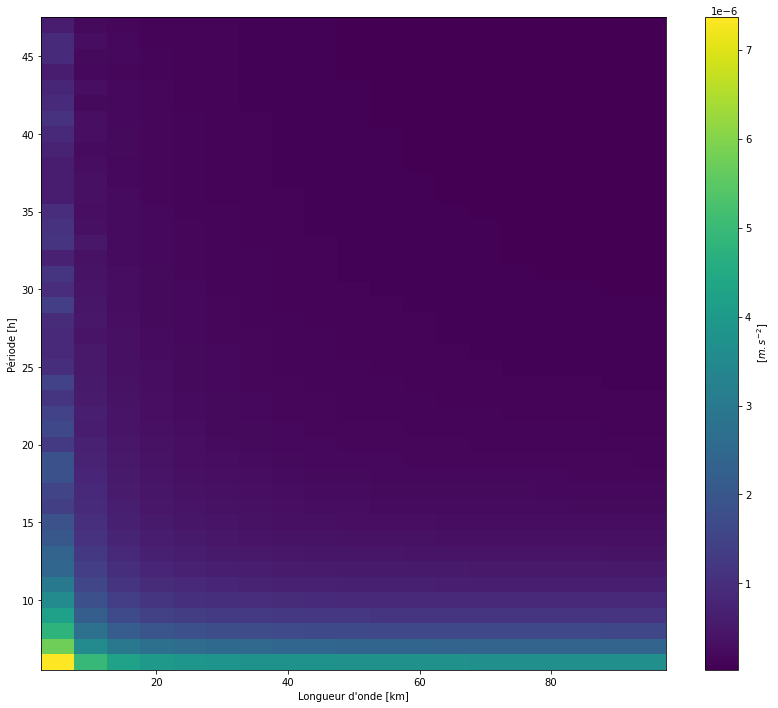

In [27]:
da.plot(x='L_km', y='T_h', figsize=(14,12))